# PREDICTING SALES PRICES USING ADVANCED REGRESSION

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

-  Which variables are significant in predicting the price of a house, and
-  How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


### Business Goal 


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Analytical Goal

- Build a regression model using Regularization - Ridge & Lasso, in order to predict the actual value of the property and decide whether or not to invest in them
- Determine which variables are significant in predicting the price of the houses
- How well those variables describe the price of a house

### Steps involved

-  Understand Business goals by gaining domain knowledge
-  Load the data and understand the variables
-  Data inspection
-  EDA
-  Missing value imputation if required
-  Train-Test split
-  Scaling
-  Modelling
-  Tuning with Regularization
-  Model Evaluation

**_STEP1: LOAD THE DATA AND UNDERSTAND THE VARIABLES_**

In [1]:
#IMPORT THE REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

#Importing packages for regression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)


In [2]:
# LOAD THE DATA

df = pd.read_csv("train.csv",na_values = 'NAN')
df.shape

(1460, 81)

In [3]:
# Lets drop ID as it does not add any value to our analysis
df = df.drop(['Id'],axis = 1)

**_UNDERSTAND THE VARIABLES_**

In [4]:
df.shape

(1460, 80)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df.describe(percentiles = [.25, .5, .75, .9, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.

In [7]:
df.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

**_STEP2: DATA INSPECTION_**

In [8]:
# Separating numerical and categorical fields for analysisng them separately using the provided Data Dictionary.
#First lets analyse our numerical variables

df_nums = df.select_dtypes(exclude = 'object')

In [9]:
per_missing_LotFrontage = round(((df_nums['LotFrontage'].isna().sum())/len(df))*100,2)
per_missing_MasVnrArea = round(((df_nums['MasVnrArea'].isna().sum())/len(df))*100,2)
print('%missing of LotFrontage is:',per_missing_LotFrontage)
print('%missing of MasVnrArea is:',per_missing_MasVnrArea)

%missing of LotFrontage is: 17.74
%missing of MasVnrArea is: 0.55


*_Since the percentage of values missing in the data is below 40%, lets try to impute the missing values in the columns_*

As we saw above, there are outliers in the data, so imputing LotFrontage and MasVnrArea with median values

In [10]:
m1 = df['MasVnrArea'].median()
m2 = int(df['GarageYrBlt'].mean())
print('The median of MasVnrArea is :',m1,'\n')
print('The mean of GarageYrBlt is:',m2)

The median of MasVnrArea is : 0.0 

The mean of GarageYrBlt is: 1978


In [11]:
df['MasVnrArea'].fillna(m1,inplace = True)
df['GarageYrBlt'].fillna(m2,inplace = True)

In [12]:
df = df.drop('LotFrontage',axis=1)

In [13]:
df.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageType        81
GarageFinish      81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
Fireplaces         0
MSSubClass         0
Functional         0
KitchenQual        0
dtype: int64

In [14]:
df_nums.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Now that are numerical columns do not have missing values, lets proceed with analysing our categorical variables

In [15]:
df_cat = df.select_dtypes(include = object)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [16]:
#Now lets calculate the percentage of missing values of each variable
round((df_cat.isnull().sum()/len(df_cat))*100,2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageFinish      5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtQual          2.53
BsmtCond          2.53
MasVnrType        0.55
Electrical        0.07
Functional        0.00
KitchenQual       0.00
CentralAir        0.00
HeatingQC         0.00
Heating           0.00
PavedDrive        0.00
SaleType          0.00
MSZoning          0.00
Street            0.00
Condition2        0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
BldgType          0.00
Foundation        0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
ExterCond         0.00
SaleCondition     0.00
dtype: floa

In order to effectively train our model we build, we must first deal with the missing values.

Looking at the data dictionary, we can see for some variables, NaN does not mean missing values, but that the housing might not have that particular feature, hence it is marked as NA. For eg., If a property does not have Pool, its mentioned as NaN.

Therefore, it might not be appropriate to drop the columns, as a feature being unavailable might affect the price of the house.

So, we will identify those variables and replace their NaN values to "None" to represent that the feature is unavailable.


In [17]:
for cols in df_cat.columns:
    print(cols)
    print(df_cat[cols].unique(),'\n')

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
[nan 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 

Ex

In [18]:
feature_not_avlbl = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                     "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", 
                     "Fence", "MiscFeature","MasVnrType"]

In [19]:
for i in feature_not_avlbl:
    df[i].fillna("None",inplace = True)

In [20]:
df.isnull().sum().sort_values(ascending = False)

Electrical      1
GarageCars      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
               ..
ExterQual       0
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
SalePrice       0
Length: 79, dtype: int64

In [21]:
#Since only one value is missing in "electrical" column, we can drop that row
df.dropna(axis=0,inplace = True)

In [22]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
Alley            0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [23]:
df.shape

(1459, 79)

There are no missing values in our data

In [24]:
df['GarageYrBlt'] = df['GarageYrBlt'].apply(np.int64)
df['MasVnrArea'] = df['MasVnrArea'].apply(np.int64)

In [25]:
df.dtypes.value_counts()

object    43
int64     36
dtype: int64

### EDA - Univariate, Bivariate Analysis, Derived metrics

#### UNIVARIATE ANALYSIS

In [26]:
# Lets first analyse the predictor variables
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


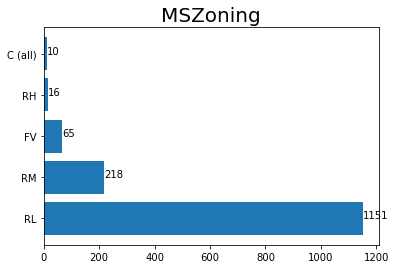

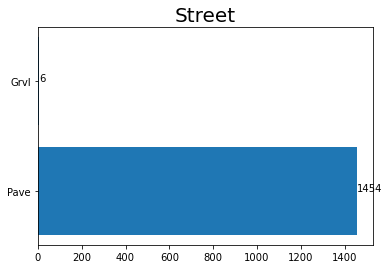

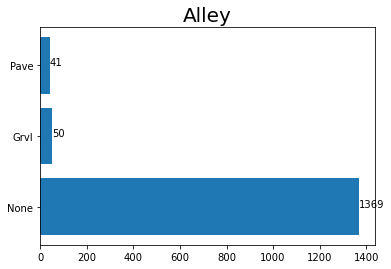

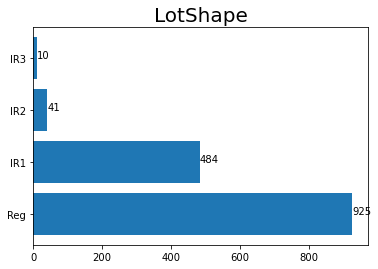

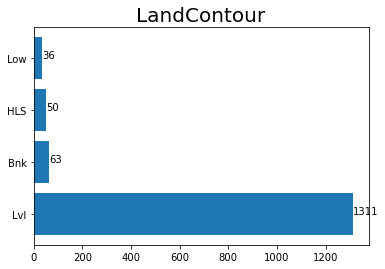

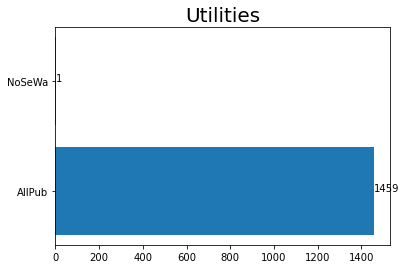

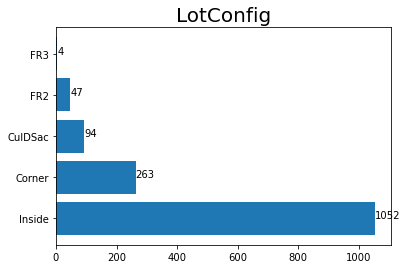

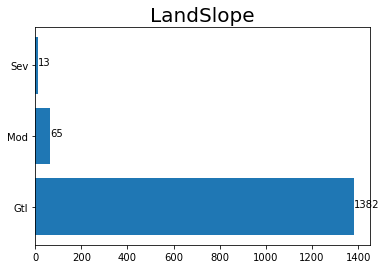

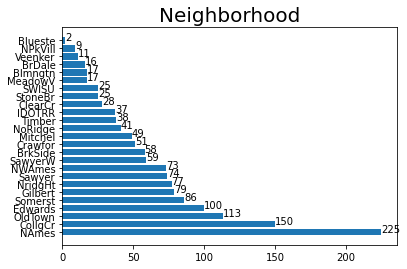

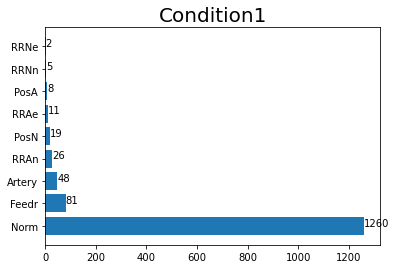

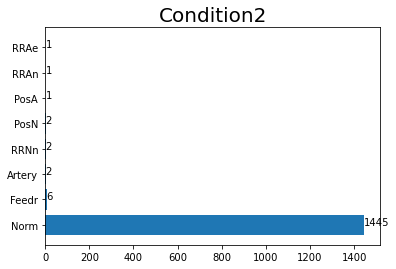

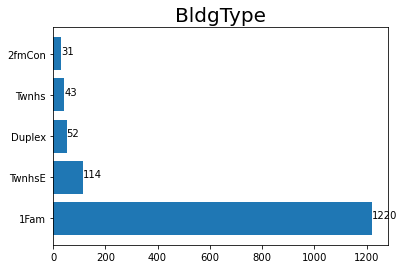

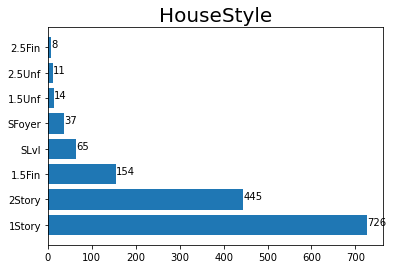

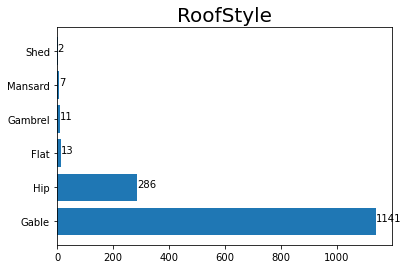

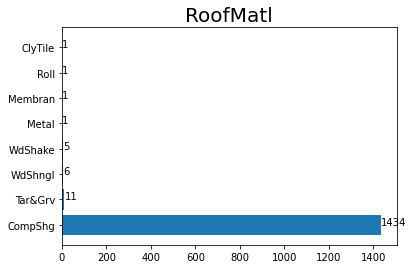

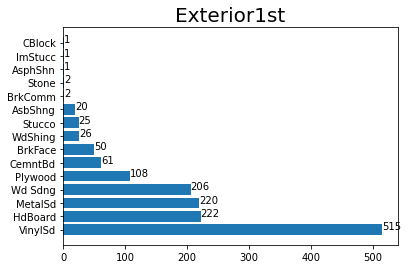

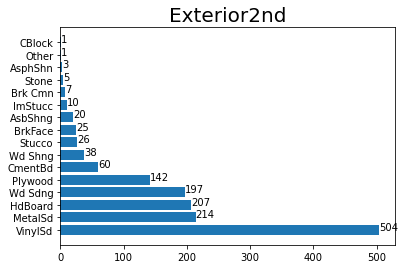

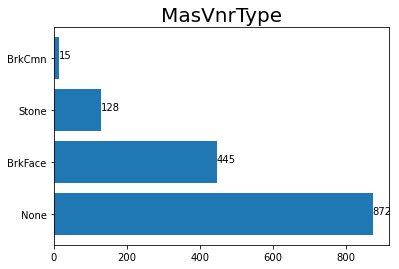

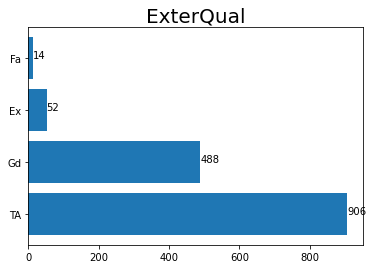

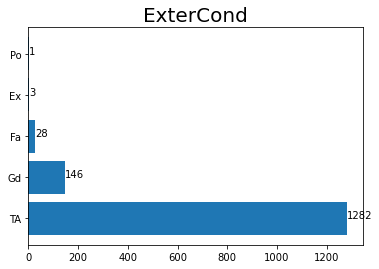

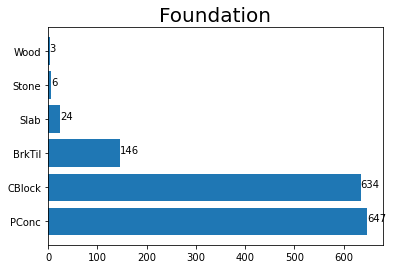

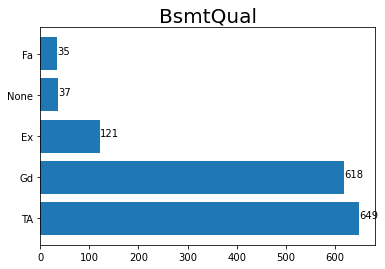

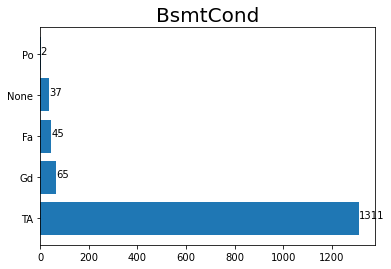

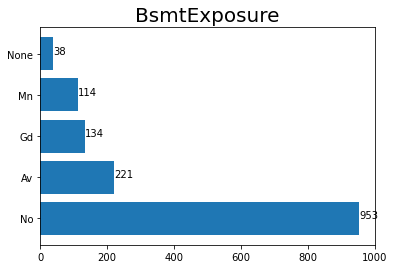

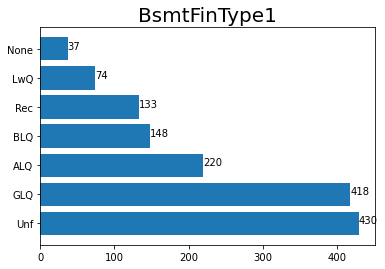

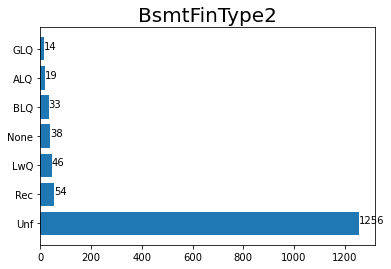

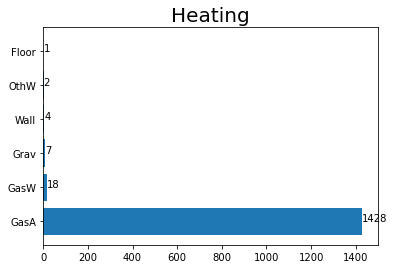

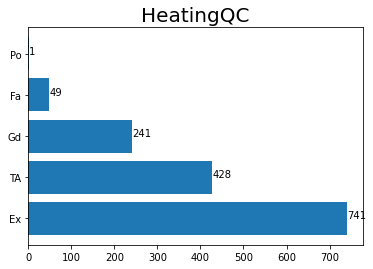

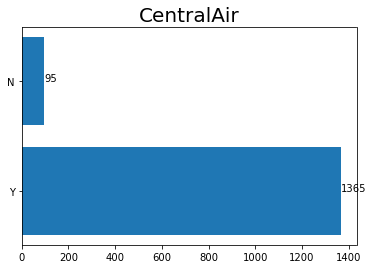

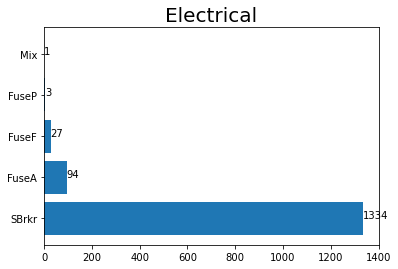

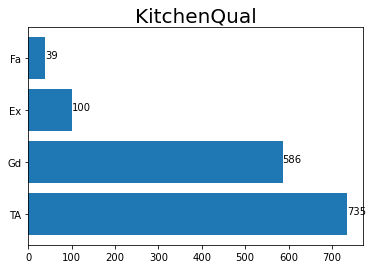

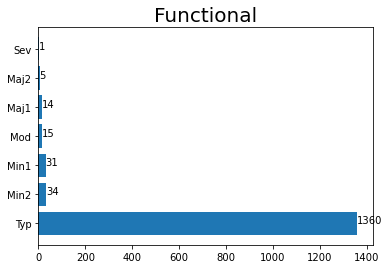

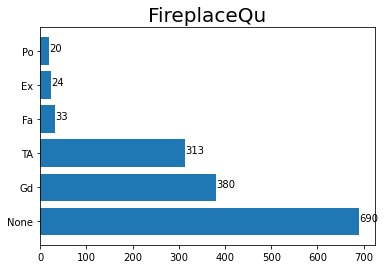

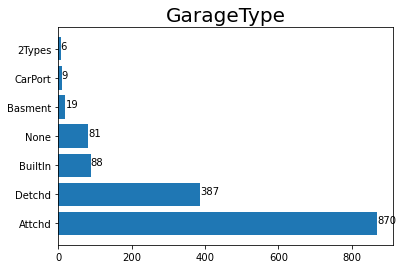

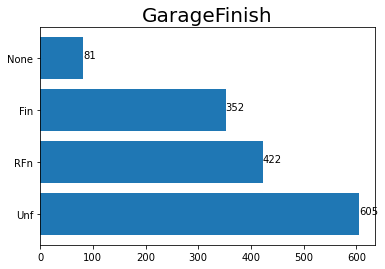

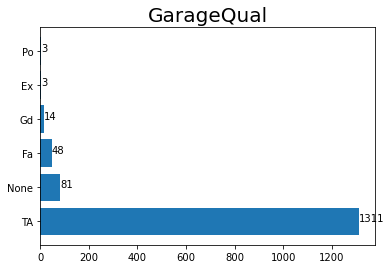

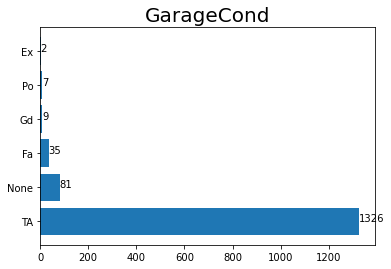

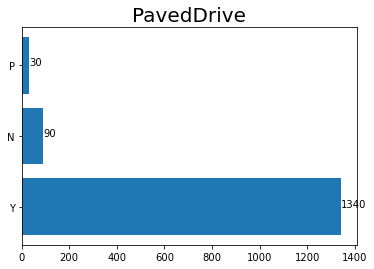

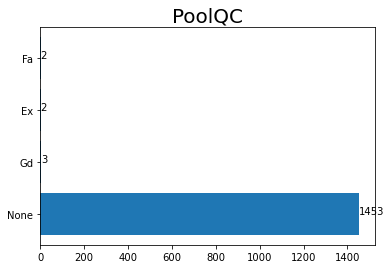

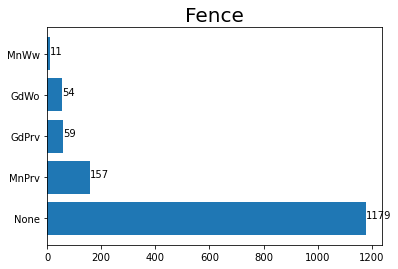

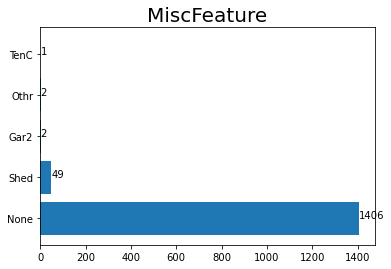

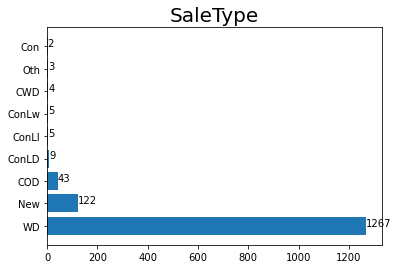

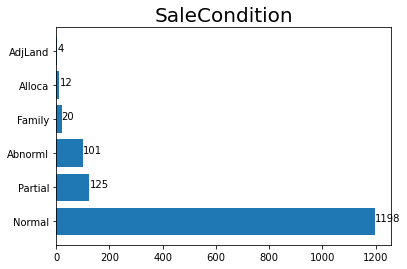

In [27]:
for cols in df_cat.columns:
    plt.title(cols,fontdict = {'fontsize':20})
    x = df_cat[cols].value_counts().index.to_list()
    y = df_cat[cols].value_counts().to_list()
    plt.barh(x, y)
    for index, value in enumerate(y):
        plt.text(value, index,
             str(value))
    plt.show()
    

**Inference :** _From the above analysis, we can see that there are no single-valued columns, so we cannot drop any columns_

### BIVARIATE ANALYSIS

Categorical data can be divided into two types:
    
-  Nominal
-  Ordinal

Lets first decide what variables are nominal and which ones are ordinal. Simply put, Nominal data is classified without a natural order or rank, whereas ordinal data has a predetermined or natural order.

As per data dictionary, the following variables are classified into Nominal and Ordinal

In [28]:
nominal = df[['MSSubClass','MSZoning','Street','Alley','Utilities','LotConfig','Neighborhood','Condition1','Condition2',
              'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Electrical','MasVnrType','Foundation',
            'Heating','CentralAir','GarageType','PavedDrive','MiscFeature','SaleType','SaleCondition']]
ordinal = df[['LotShape','LandContour','LandSlope','OverallQual','OverallCond','ExterQual',
              'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
              'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence']]

In [29]:
#Now lets visualize how our nominal variables with the SalesPrice

In [30]:
xvar = nominal
yvar = df[['SalePrice']]
nom = pd.concat([nominal,yvar],axis = 1)
nom.head()

,MSSubClass,MSZoning,Street,Alley,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Electrical,MasVnrType,Foundation,Heating,CentralAir,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,None,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,SBrkr,BrkFace,PConc,GasA,Y,Attchd,Y,None,WD,Normal,208500
1,20,RL,Pave,None,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,SBrkr,None,CBlock,GasA,Y,Attchd,Y,None,WD,Normal,181500
2,60,RL,Pave,None,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,SBrkr,BrkFace,PConc,GasA,Y,Attchd,Y,None,WD,Normal,223500
3,70,RL,Pave,None,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,SBrkr,None,BrkTil,GasA,Y,Detchd,Y,None,WD,Abnorml,140000
4,60,RL,Pave,None,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,SBrkr,BrkFace,PConc,GasA,Y,Attchd,Y,None,WD,Normal,250000


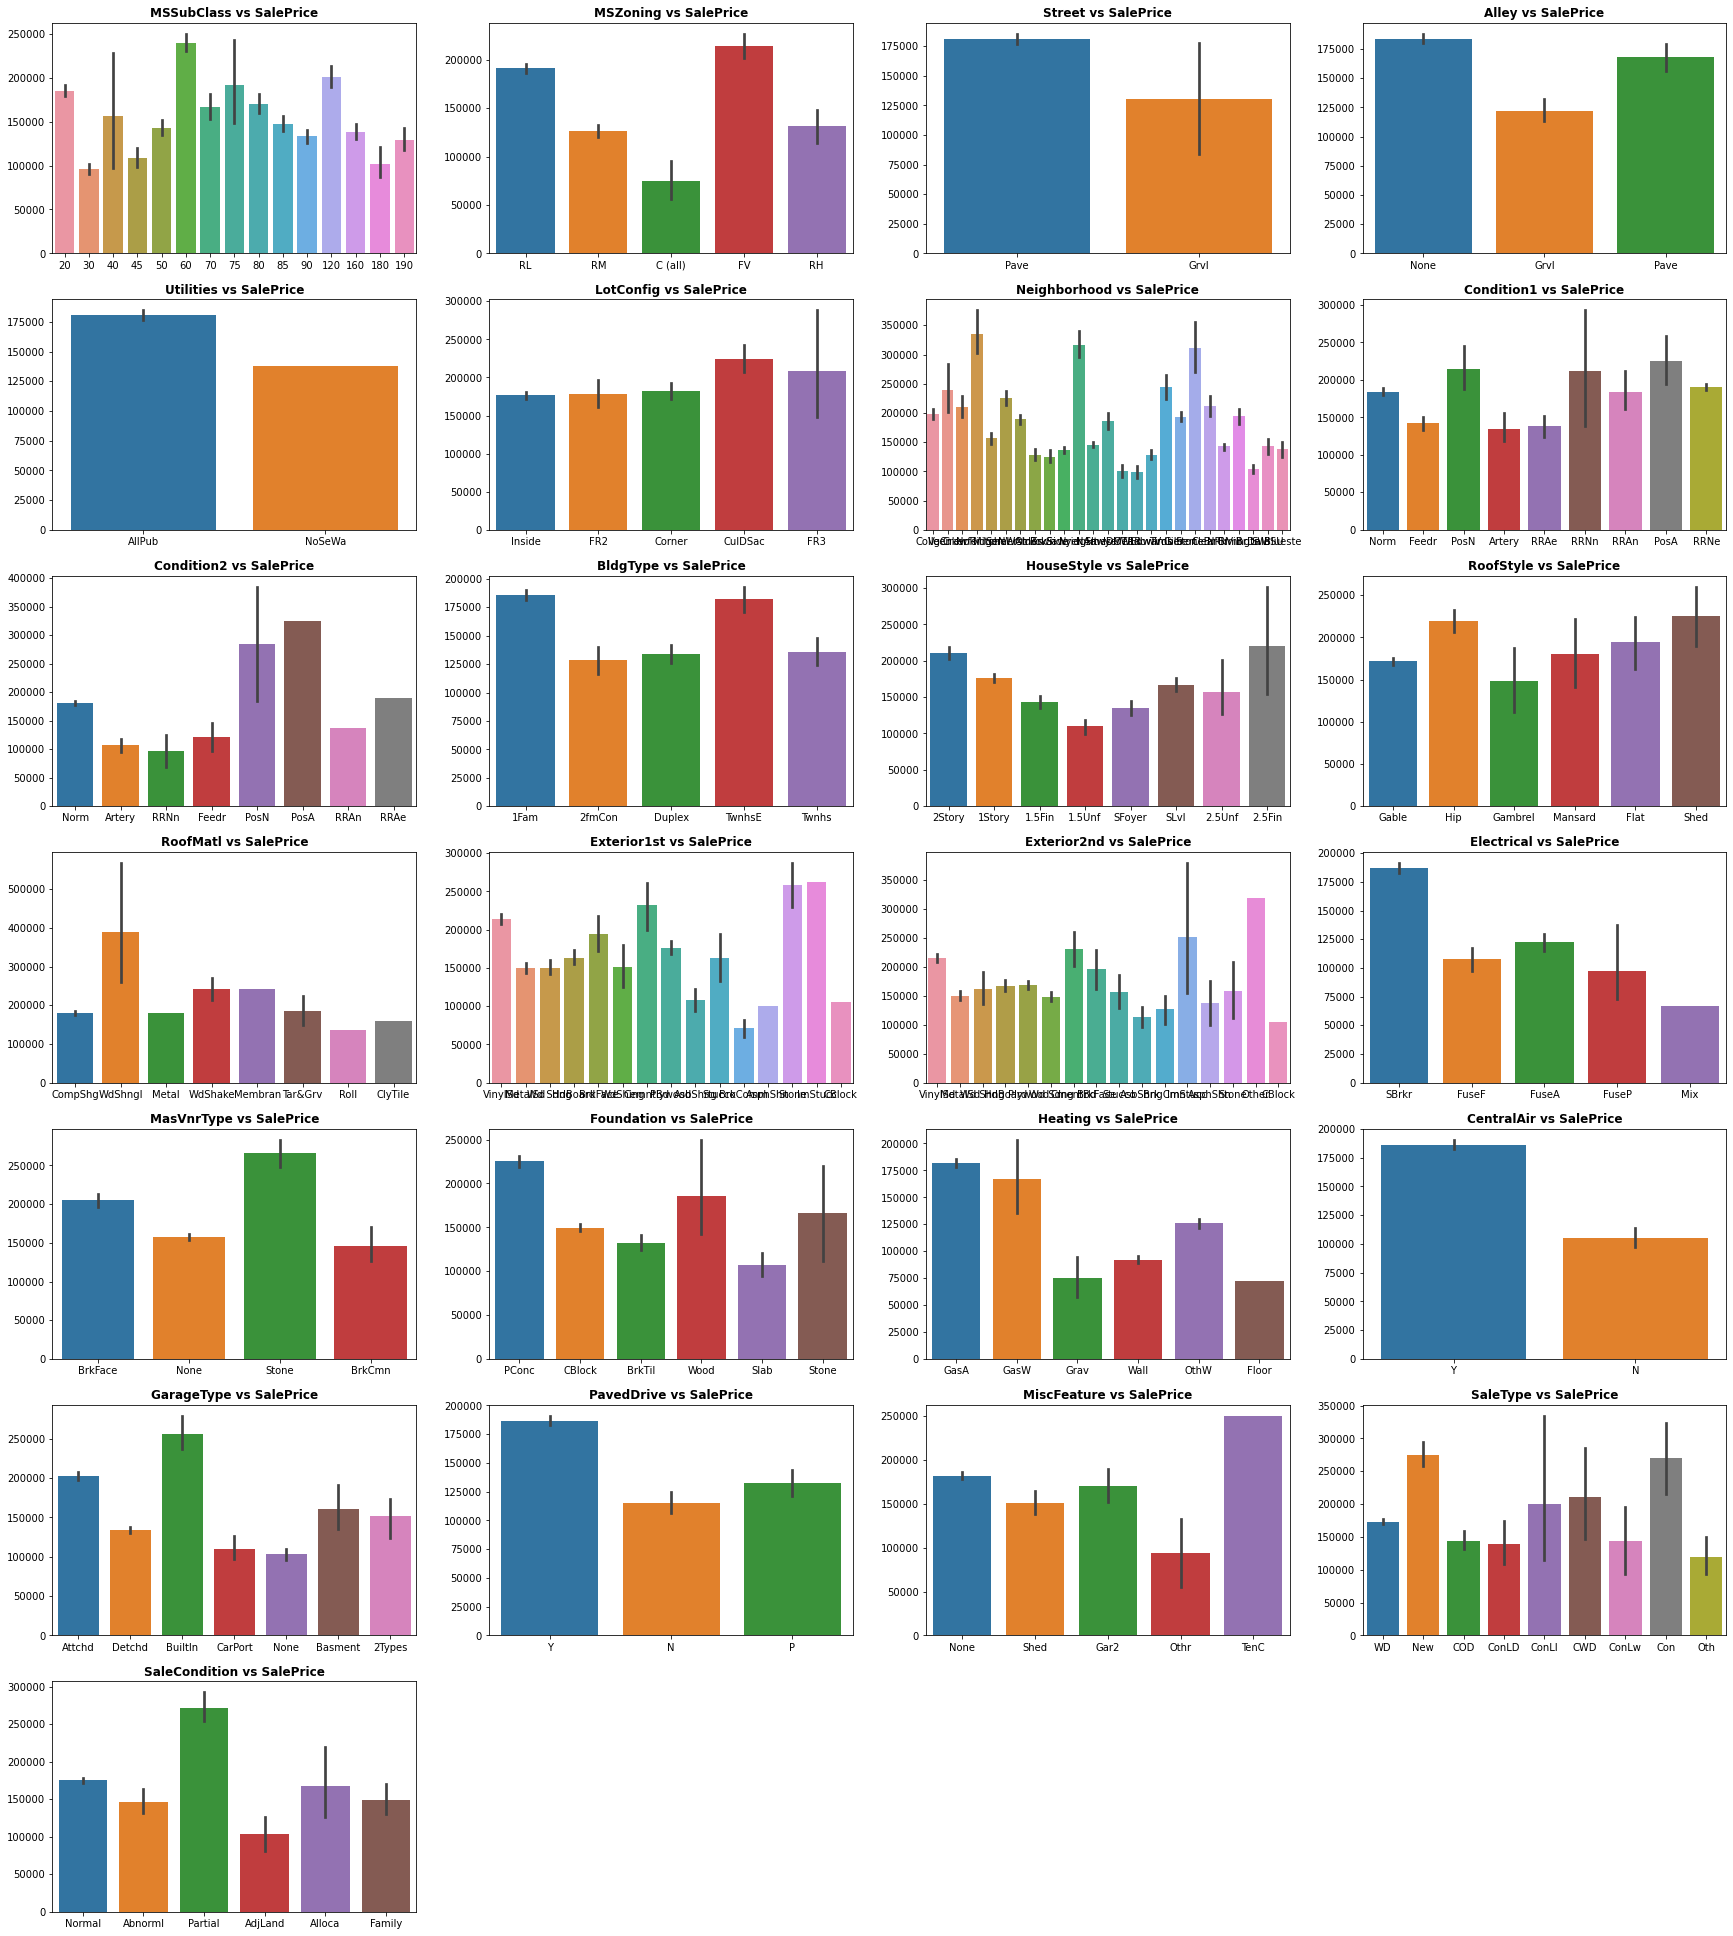

In [31]:
plt.figure(figsize=(30, 50))

step = 1

for column in nom:
    if column != 'SalePrice':
        plt.subplot(10, 4, step)
        sns.barplot(nom[column], nom['SalePrice']).set(ylabel=None, xlabel=None)
        plt.title(column + " vs " + 'SalePrice', weight='bold')
        step += 1
    
plt.show()

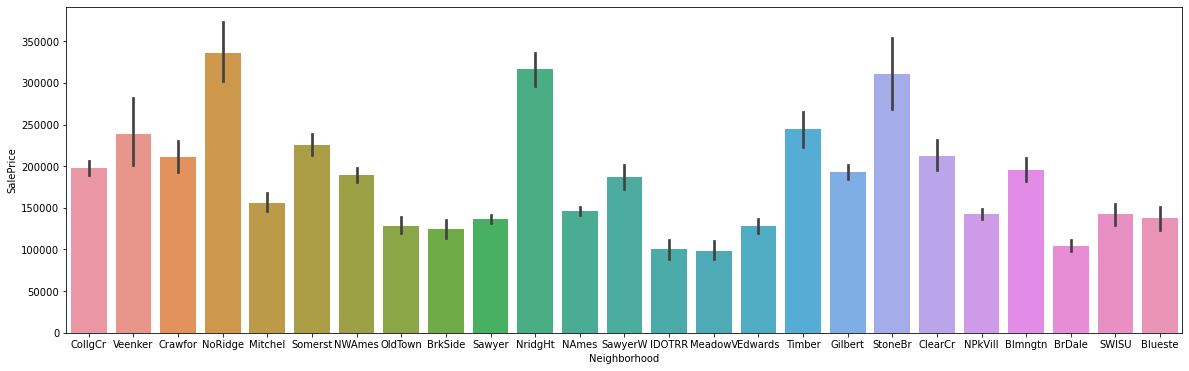

In [32]:
plt.figure(figsize=(20,6))
sns.barplot(x = 'Neighborhood', y = 'SalePrice',data = df)
plt.show()

INFERENCE:

From the above analysis, it is evident that

- SalesPrice is highest for 2-STORY 1946 & NEWER type of dwelling
- SalesPrice is highlest for Floating village - Residential and Residential areas where there is Low Density
- SalesPrice is highest for housing near Northridge,Stone Brook,Northridge Heights
- SalesPrice increases with housing properties having Tennis Courts
- SalesPrice is highest for building having roof material as 'Wood Shingles' and Roof types Hip and Shed
- SalesPrice is highest for new homes as indicated in the 'SaleCondition'

In [33]:
xvar = ordinal
yvar = df[['SalePrice']]
ordn = pd.concat([ordinal,yvar],axis = 1)
ordn.head()

,LotShape,LandContour,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,SalePrice
0,Reg,Lvl,Gtl,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,Typ,None,RFn,TA,TA,None,None,208500
1,Reg,Lvl,Gtl,6,8,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,Typ,TA,RFn,TA,TA,None,None,181500
2,IR1,Lvl,Gtl,7,5,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Typ,TA,RFn,TA,TA,None,None,223500
3,IR1,Lvl,Gtl,7,5,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Typ,Gd,Unf,TA,TA,None,None,140000
4,IR1,Lvl,Gtl,8,5,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,Typ,TA,RFn,TA,TA,None,None,250000


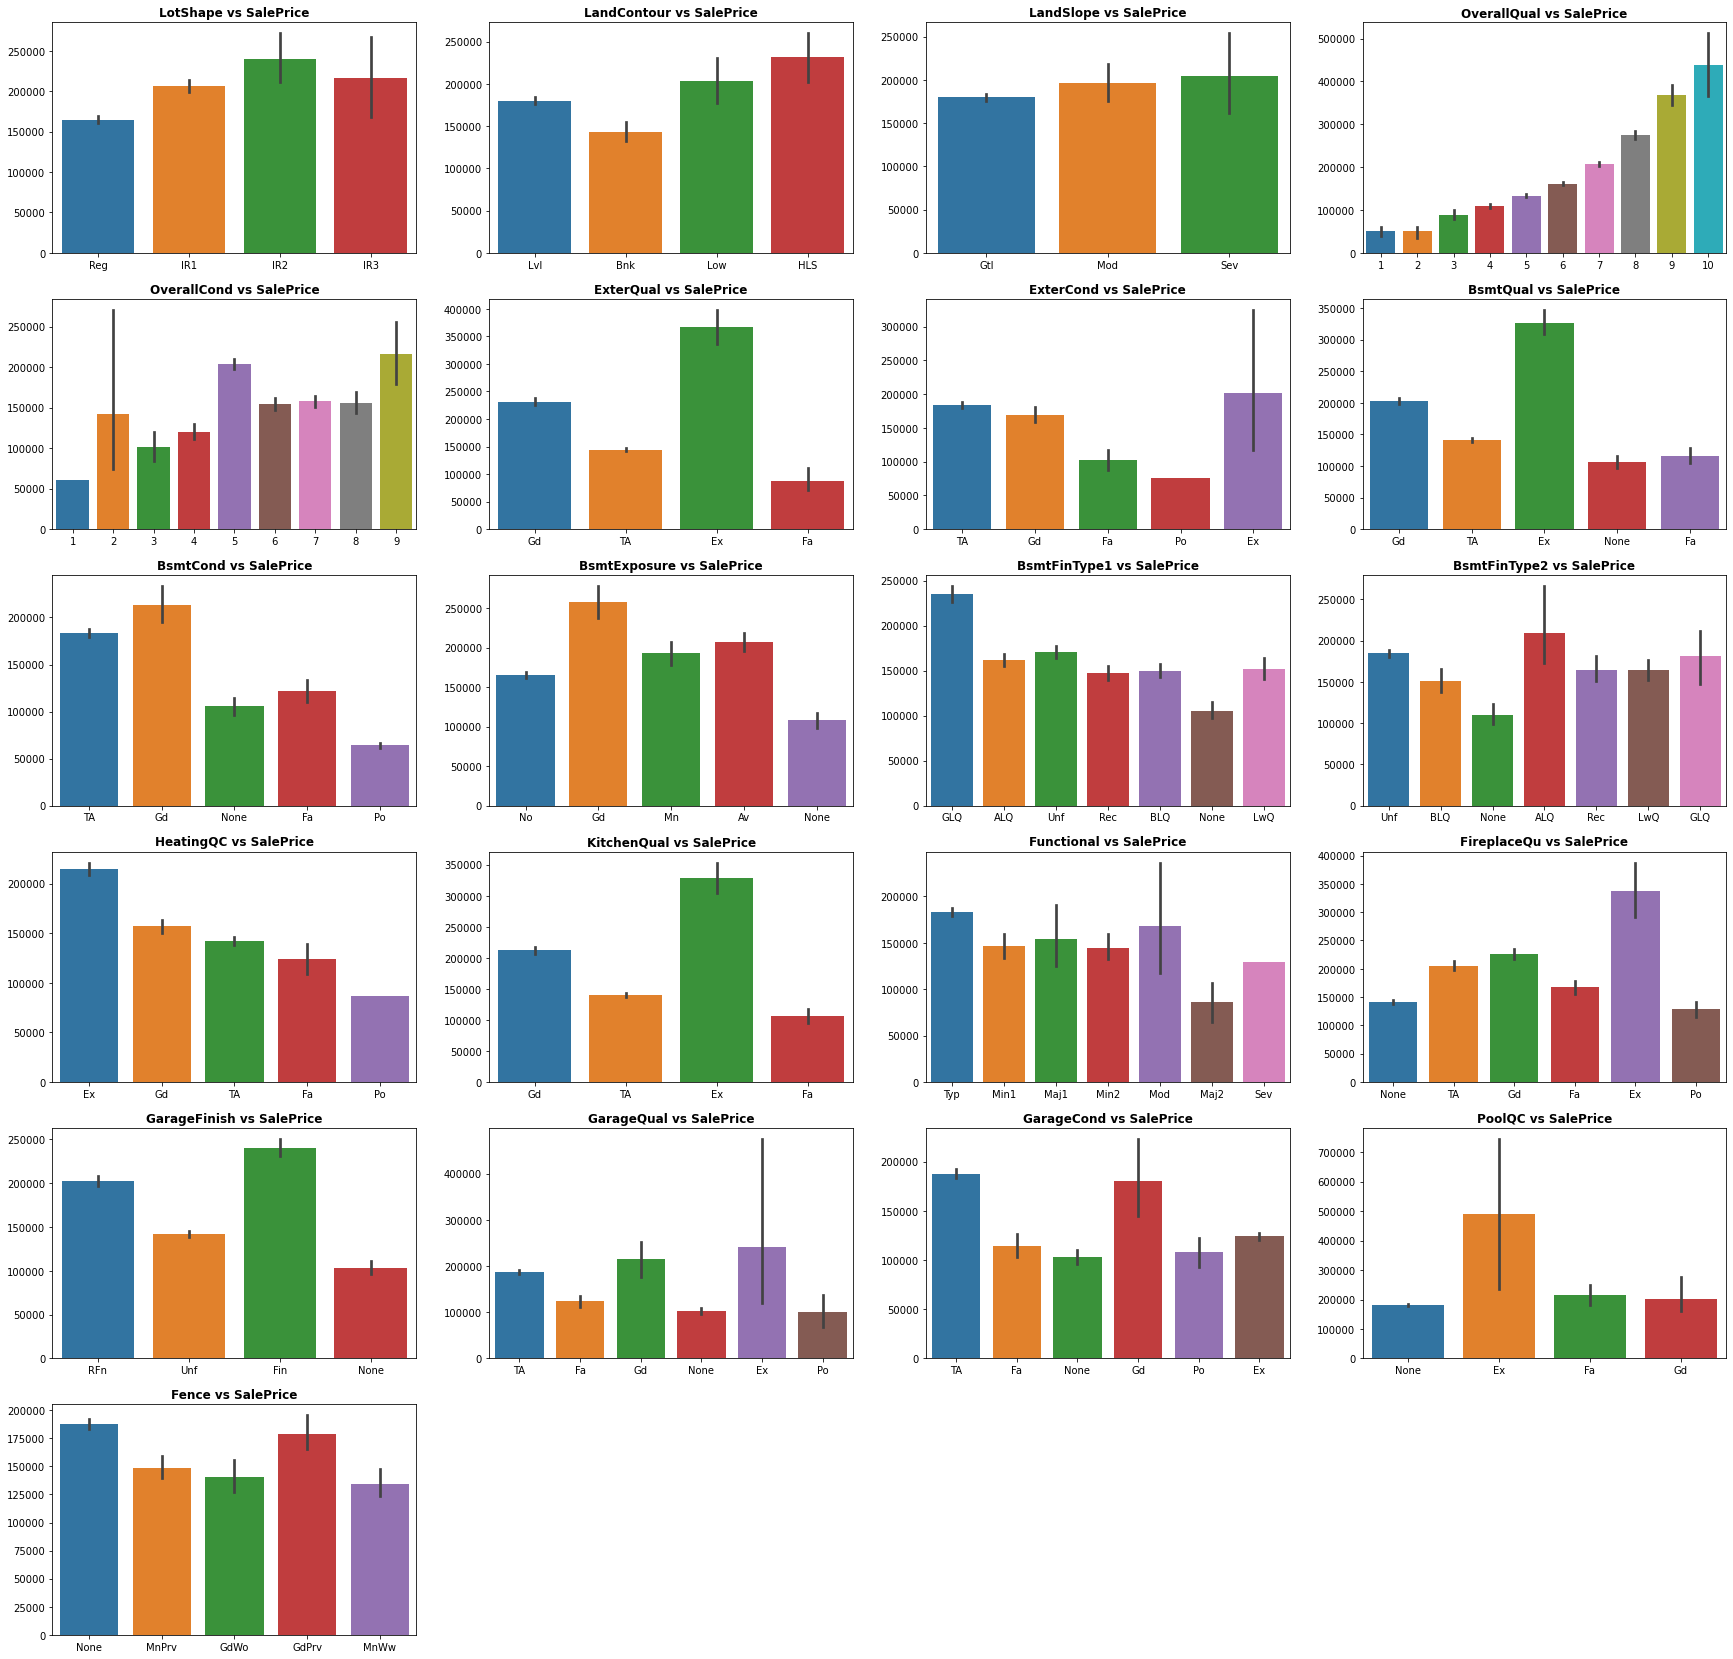

In [34]:
plt.figure(figsize=(30, 50))

step = 1

for column in ordn:
    if column != 'SalePrice':
        plt.subplot(10, 4, step)
        sns.barplot(ordn[column], ordn['SalePrice']).set(ylabel=None, xlabel=None)
        plt.title(column + " vs " + 'SalePrice', weight='bold')
        step += 1
    
plt.show()

**Inference** : _From the above analysis, it is evident that the SalesPrice increases with the overall condition of the property, quality of the additional features like Kitchen, Pool,Garage,etc.,_

In [35]:
#Now lets derive some new variables from the existing ones

df.columns
xvar = df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
years = pd.concat([xvar,yvar],axis=1)
years.head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,SalePrice
0,2003,2003,2003,2008,208500
1,1976,1976,1976,2007,181500
2,2001,2002,2001,2008,223500
3,1915,1970,1998,2006,140000
4,2000,2000,2000,2008,250000


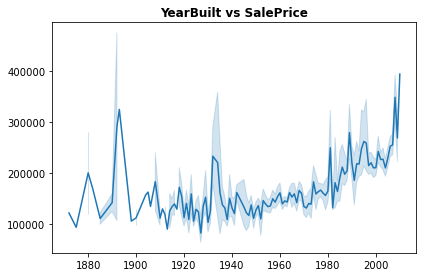

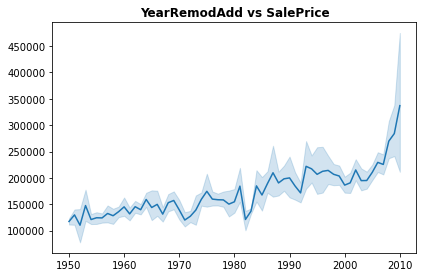

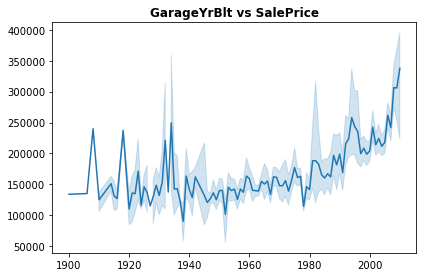

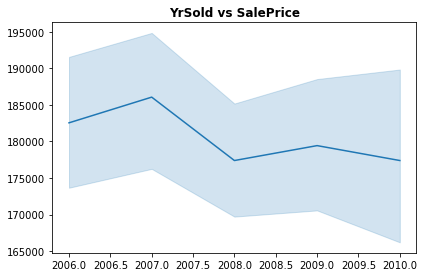

In [36]:
c = 1

for column in years:
    if column != 'SalePrice':
        plt.figure(figsize=(30, 50))
        plt.subplot(10, 4, c)
        sns.lineplot(years[column], years['SalePrice']).set(ylabel=None, xlabel=None)
        plt.title(column + " vs " + 'SalePrice', weight='bold')
        c += 1
        plt.show()

**Inference:** The price of the property is seen steadily increasing with time,now lets derive new metrics from the variables. Lets calculate the age of the property using the available. 

Creating a new column to calculate the age of the house - one of the features we look at when purchasing a property - building age, if remodification done - how long it has been

In [37]:
df['Age_House'] = df['YrSold'] - df['YearBuilt']
df['Age_Remoded'] = df['YrSold'] - df['YearRemodAdd']
df['Age_Garage'] = df['YrSold'] - df['GarageYrBlt']


In [38]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_House,Age_Remoded,Age_Garage
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,5,5,5
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,31,31,31
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,7,6,7
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,91,36,8
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,8,8,8


In [39]:
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis =1)

In [40]:
df.shape

(1459, 78)

#### Now lets analyse our numerical values and check if there are any predictor variables highly correlated or if there are any outliers in the data

In [41]:
df.dtypes.value_counts()

object    43
int64     35
dtype: int64

In [42]:
nums = df.select_dtypes(include = 'int64')
nums = nums.drop(['SalePrice'],axis = 1)

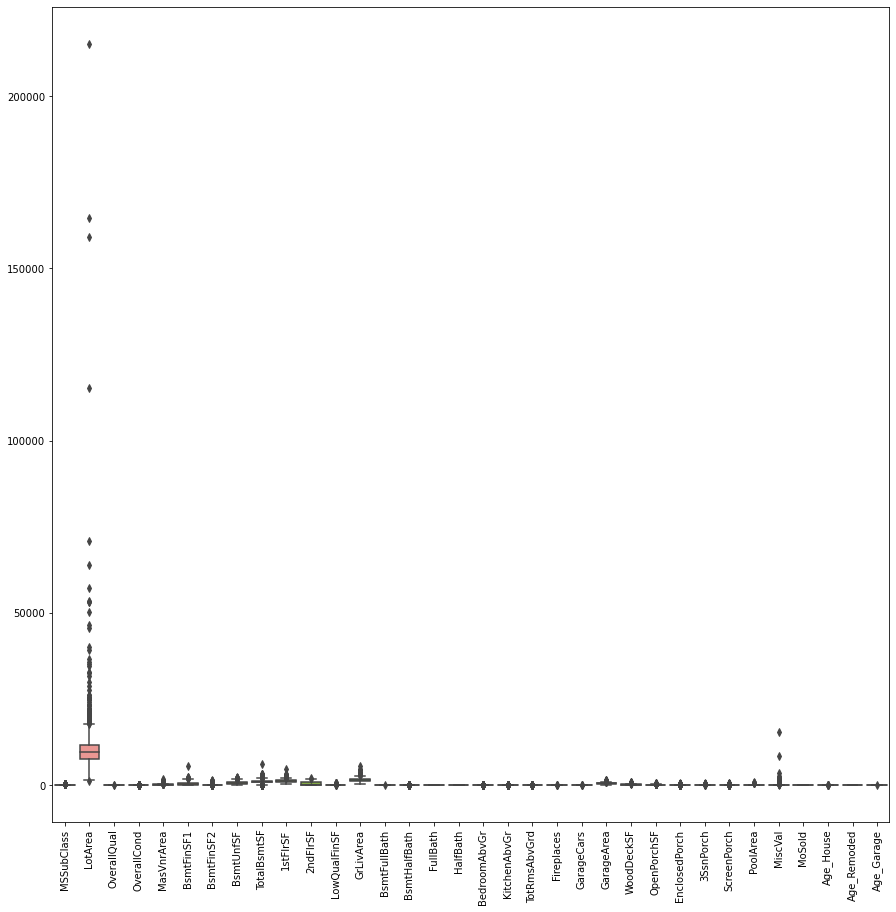

In [43]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=nums);

In [44]:
nums.describe(percentiles = [0, .05, .25, .5, .75, .9, .95, .99])

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_House,Age_Remoded,Age_Garage
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,10517.363948,6.100069,5.575737,103.187800,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,5.848526,1515.546950,0.425634,0.057574,1.564770,0.382454,2.866347,1.046607,6.517478,0.613434,1.766964,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,36.571624,22.965045,29.357094
std,42.310746,9984.666267,1.383171,1.113079,180.773158,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,48.639512,525.650927,0.518969,0.238830,0.550987,0.502798,0.816050,0.220410,1.625902,0.644687,0.747546,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,30.246986,20.639721,24.029745
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000
0%,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000
5%,20.000000,3307.400000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,520.000000,672.900000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
25%,20.000000,7549.000000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,8.000000,4.000000,7.000000
50%,50.000000,9477.000000,6.000000,5.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,35.000000,14.000000,29.000000
75%,70.000000,11603.000000,7.000000,6.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,54.000000,41.000000,46.000000
90%,120.000000,14388.400000,8.000000,7.000000,335.000000,1066.000000,117.400000,1232.000000,1602.400000,1680.000000,954.400000,0.000000,2158.600000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.200000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,84.000000,56.000000,61.000000


From the above analysis, we can see that there are outliers in the data, lets remove the outliers to better represent our data

In [45]:
for a in nums.columns:
    q_l = round((nums[a].quantile(0.05)),2)
    q_h = round((nums[a].quantile(0.95)),2)
    
    nums[a][nums[a]<= q_l] = q_l
    nums[a][nums[a]>= q_h] = q_h 
   

Now that we have capped the outliers at 5% and 95%, lets check how the data is now

In [46]:
nums.describe(percentiles = [0, .05, .25, .5, .75, .9, .95, .99])

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_House,Age_Remoded,Age_Garage
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.0,1459.0,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.127485,9682.125497,6.067855,5.586703,92.111035,431.384510,32.963811,556.655929,1056.352981,1152.144071,337.526594,0.0,1498.999040,0.413982,0.056203,1.548321,0.374229,2.882111,1.0,6.500343,0.610007,1.763537,468.239616,88.882111,42.896710,19.174709,0.0,11.588759,0.0,0.0,6.322138,36.007539,22.912954,28.936943
std,40.159322,3471.680389,1.225104,1.015579,140.618197,412.201604,100.636162,414.699735,346.682373,333.664774,415.327586,0.0,450.889132,0.492714,0.230392,0.497830,0.484089,0.660321,0.0,1.516428,0.634563,0.739545,202.135558,109.429020,53.156796,50.424418,0.0,40.130115,0.0,0.0,2.551607,28.825297,20.547111,23.044720
min,20.000000,3307.400000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,520.000000,672.900000,0.000000,0.0,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.000000,1.000000,0.000000,0.000000
0%,20.000000,3307.400000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,520.000000,672.900000,0.000000,0.0,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.000000,1.000000,0.000000,0.000000
5%,20.000000,3315.140000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,520.000000,672.990000,0.000000,0.0,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.000000,1.000000,0.000000,0.000000
25%,20.000000,7549.000000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.0,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,8.000000,4.000000,7.000000
50%,50.000000,9477.000000,6.000000,5.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,0.0,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,35.000000,14.000000,29.000000
75%,70.000000,11603.000000,7.000000,6.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.0,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,54.000000,41.000000,46.000000
90%,120.000000,14388.400000,8.000000,7.000000,335.000000,1066.000000,117.400000,1232.000000,1602.400000,1680.000000,954.400000,0.0,2158.600000,1.000000,0.000000,2.000000,1.000000,4.000000,1.0,9.000000,1.000000,3.000000,757.200000,262.000000,130.000000,112.000000,0.0,0.000000,0.0,0.0,10.000000,84.000000,56.000000,61.000000


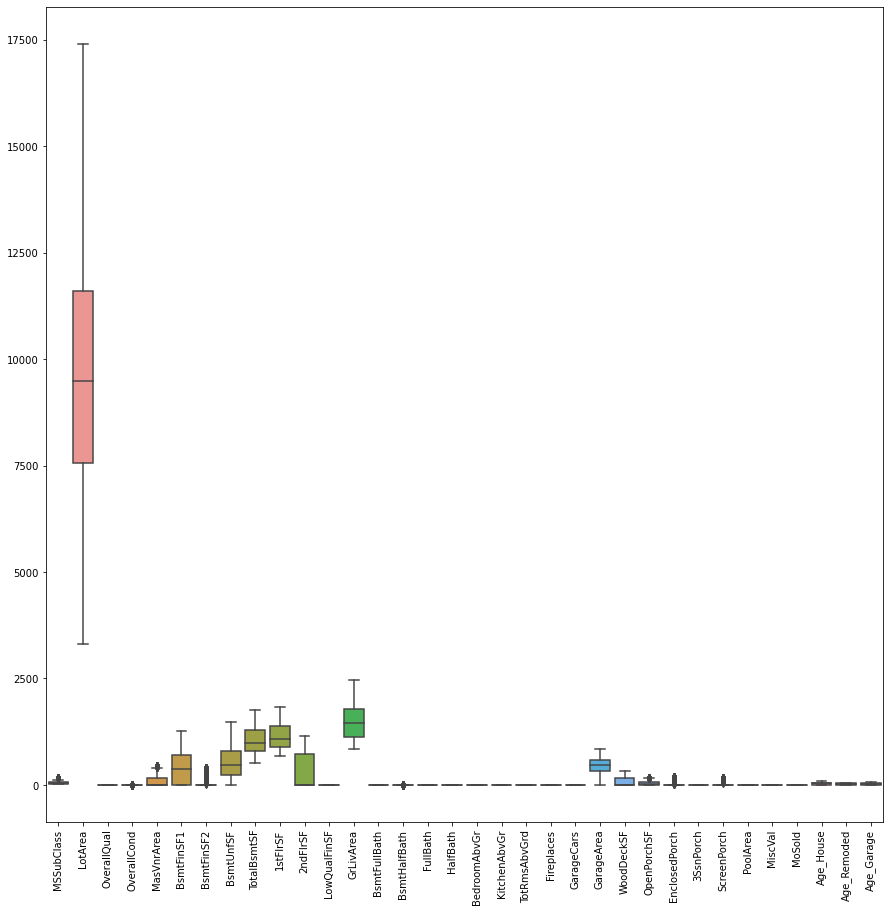

In [47]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=nums);

From the above analysis, we have removed outliers from our data

In [48]:
nums = round(nums,2)
nums

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_House,Age_Remoded,Age_Garage
0,60,8450.0,7,5,196,706,0.0,150,856,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2,548.0,0,61.0,0.0,0,0,0,0,2,5,5,5
1,20,9600.0,6,8,0,978,0.0,284,1262,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,2,460.0,298,0.0,0.0,0,0,0,0,5,31,31,31
2,60,11250.0,7,5,162,486,0.0,434,920,920.0,866.0,0,1786.0,1,0,2,1,3,1,6,1,2,608.0,0,42.0,0.0,0,0,0,0,9,7,6,7
3,70,9550.0,7,5,0,216,0.0,540,756,961.0,756.0,0,1717.0,1,0,1,0,3,1,7,1,3,642.0,0,35.0,180.3,0,0,0,0,2,91,36,8
4,60,14260.0,8,5,350,655,0.0,490,1145,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,9,1,3,836.0,192,84.0,0.0,0,0,0,0,11,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917.0,6,5,0,0,0.0,953,953,953.0,694.0,0,1647.0,0,0,2,1,3,1,7,1,2,460.0,0,40.0,0.0,0,0,0,0,8,8,7,8
1456,20,13175.0,6,6,119,790,163.0,589,1542,1831.5,0.0,0,2073.0,1,0,2,0,3,1,7,2,2,500.0,335,0.0,0.0,0,0,0,0,2,32,22,32
1457,70,9042.0,7,8,0,275,0.0,877,1152,1188.0,1141.1,0,2340.0,0,0,2,0,4,1,9,2,1,252.0,0,60.0,0.0,0,0,0,0,5,69,4,69
1458,20,9717.0,5,6,0,49,396.4,0,1078,1078.0,0.0,0,1078.0,1,0,1,0,2,1,5,0,1,240.0,335,0.0,112.0,0,0,0,0,4,60,14,60


In [49]:
# For easy interpretation, lets convert float values to int as they donot have any decimal values

In [50]:
nums = nums.apply(np.int64)

In [51]:
nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1459 non-null   int64
 1   LotArea        1459 non-null   int64
 2   OverallQual    1459 non-null   int64
 3   OverallCond    1459 non-null   int64
 4   MasVnrArea     1459 non-null   int64
 5   BsmtFinSF1     1459 non-null   int64
 6   BsmtFinSF2     1459 non-null   int64
 7   BsmtUnfSF      1459 non-null   int64
 8   TotalBsmtSF    1459 non-null   int64
 9   1stFlrSF       1459 non-null   int64
 10  2ndFlrSF       1459 non-null   int64
 11  LowQualFinSF   1459 non-null   int64
 12  GrLivArea      1459 non-null   int64
 13  BsmtFullBath   1459 non-null   int64
 14  BsmtHalfBath   1459 non-null   int64
 15  FullBath       1459 non-null   int64
 16  HalfBath       1459 non-null   int64
 17  BedroomAbvGr   1459 non-null   int64
 18  KitchenAbvGr   1459 non-null   int64
 19  TotRms

In [52]:
nums.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Age_House', 'Age_Remoded', 'Age_Garage'],
      dtype='object')

In [53]:
df.shape

(1459, 78)

In [54]:
df = df.drop(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'Age_House', 'Age_Remoded', 'Age_Garage',
       'SalePrice'],axis = 1)

In [55]:
df.shape

(1459, 43)

In [56]:
#Concating the values to the main dataframe after outlier treatment
df = pd.concat([df,nums,yvar],axis=1)

In [57]:
df.shape

(1459, 78)

<AxesSubplot:>

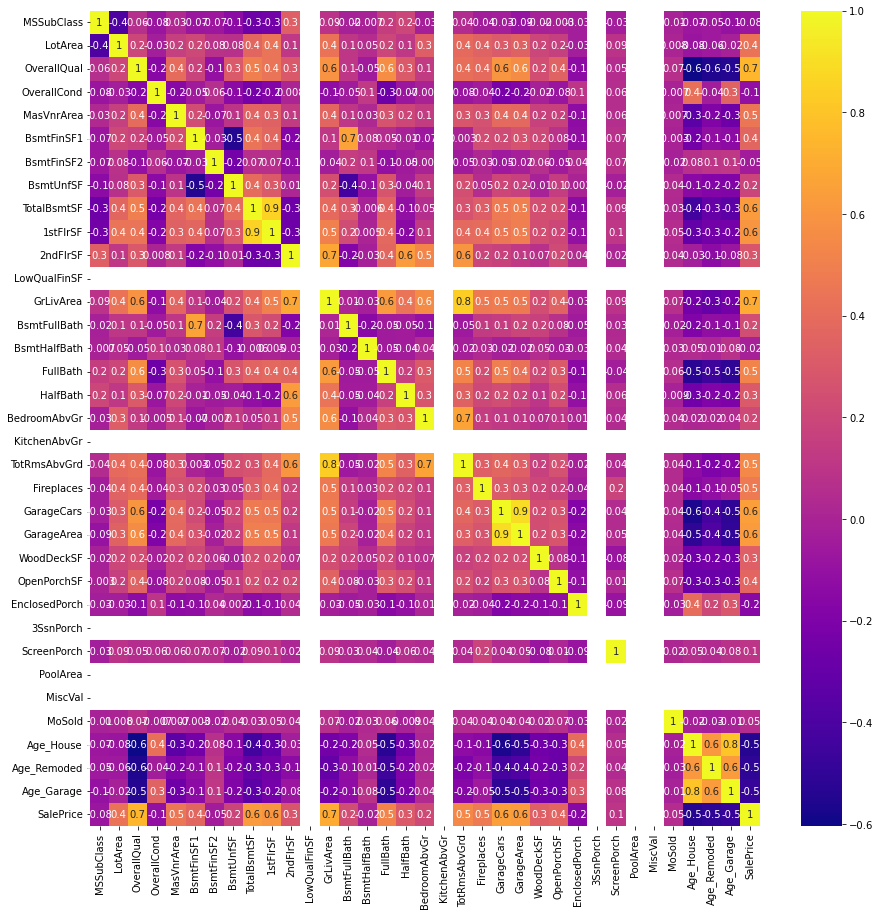

In [58]:
plt.figure(figsize=[15,15])
sns.heatmap(data = pd.concat([nums,yvar],axis=1).corr(),cmap = 'plasma',annot = True,fmt= '.1g')

-  From the above heatmap, it is evident that many columns are highly correlated with each other.
-  Target variable 'SalesPrice' is highly positively correlated with 'OverAllQual','GrLivArea','Garagecars','GarageArea'
-  Target variable 'SalesPrice' is negatively correlated with 'Age_House','Age_Remod','Age_Garage'


### DUMMY VARIABLE CREATION - USING ONE HOT ENCODER

In [59]:
nominal.head()
nominal['MSSubClass'] = nominal['MSSubClass'].astype('category')

In [60]:
one_hot_encoder = pd.get_dummies(nominal,drop_first = True)

In [61]:
one_hot_encoder

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0

In [62]:
nominal.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Electrical',
       'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType',
       'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [63]:
df = df.drop(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Electrical',
       'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType',
       'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'],axis =1)

In [64]:
df

,LotShape,LandContour,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_House,Age_Remoded,Age_Garage,SalePrice
0,Reg,Lvl,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,Typ,None,RFn,TA,TA,None,None,8450,7,5,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,5,5,5,208500
1,Reg,Lvl,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,Typ,TA,RFn,TA,TA,None,None,9600,6,8,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,31,31,31,181500
2,IR1,Lvl,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Typ,TA,RFn,TA,TA,None,None,11250,7,5,162,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,7,6,7,223500
3,IR1,Lvl,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Typ,Gd,Unf,TA,TA,None,None,9550,7,5,0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,180,0,0,0,0,2,91,36,8,140000
4,IR1,Lvl,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,Typ,TA,RFn,TA,TA,None,None,14260,8,5,350,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,11,8,8,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Lvl,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Ex,TA,Typ,TA,RFn,TA,TA,None,None,7917,6,5,0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,8,7,8,175000
1456,Reg,Lvl,Gtl,TA,TA,Gd,TA,No,ALQ,Rec,TA,TA,Min1,TA,Unf,TA,TA,None,MnPrv,13175,6,6,119,790,163,589,1542,1831,0,0,2073,1,0,2,0,3,1,7,2,2,500,335,0,0,0,0,0,0,2,32,22,32,210000
1457,Reg,Lvl,Gtl,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,Typ,Gd,RFn,TA,TA,None,GdPrv,9042,7,8,0,275,0,877,1152,1188,1141,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,0,5,69,4,69,266500
1458,Reg,Lvl,Gtl,TA,TA,TA,TA,Mn,GLQ,Rec,Gd,Gd,Typ,None,Unf,TA,TA,None,None,9717,5,6,0,49,396,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,335,0,112,0,0,0,0,4,60,14,60,142125


In [65]:
df = pd.concat([df,one_hot_encoder],axis=1)

In [66]:
df.shape

(1459, 213)

### LABEL ENCODING 

In [67]:
from sklearn import preprocessing

In [68]:
for cols in ordinal.columns:
    label_encoder = preprocessing.LabelEncoder()
    ordinal[cols] = label_encoder.fit_transform(ordinal[cols])

In [69]:
ordinal.head()

,LotShape,LandContour,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,3,3,0,6,4,2,4,2,4,3,2,6,0,2,6,3,2,5,5,3,4
1,3,3,0,5,7,3,4,2,4,1,0,6,0,3,6,5,2,5,5,3,4
2,0,3,0,6,4,2,4,2,4,2,2,6,0,2,6,5,2,5,5,3,4
3,0,3,0,6,4,3,4,4,1,3,0,6,2,2,6,2,3,5,5,3,4
4,0,3,0,7,4,2,4,2,4,0,2,6,0,2,6,5,2,5,5,3,4


In [70]:
ordinal.columns

Index(['LotShape', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence'],
      dtype='object')

In [71]:
df = df.drop(['LotShape', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence'],axis=1)

In [72]:
df.shape

(1459, 192)

In [73]:
df = pd.concat([df,ordinal],axis=1)

In [74]:
df.shape

(1459, 213)

In [75]:
df.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_House,Age_Remoded,Age_Garage,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,8450,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,5,5,5,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,0,6,4,2,4,2,4,3,2,6,0,2,6,3,2,5,5,3,4
1,9600,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,31,31,31,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

Now that our predictor variables are clean and transformed, lets check our target variable

In [76]:
yvar.describe()

,SalePrice
count,1459.000000
mean,180930.394791
std,79468.964025
min,34900.000000
25%,129950.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


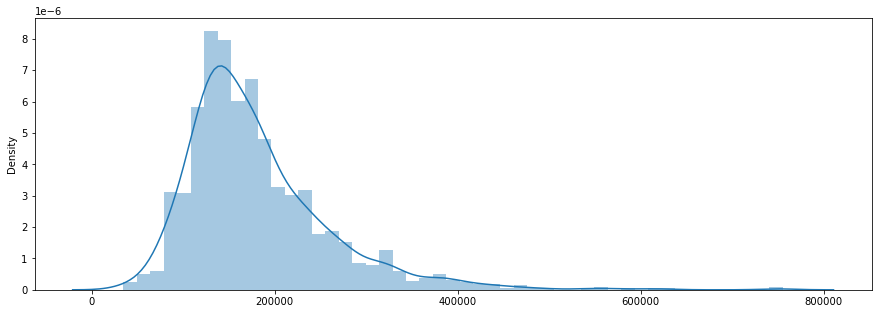

In [77]:
plt.figure(figsize = (15,5))
sns.distplot(yvar)
plt.show()

It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.

In [78]:
df['trans_Price'] = np.log(df["SalePrice"])

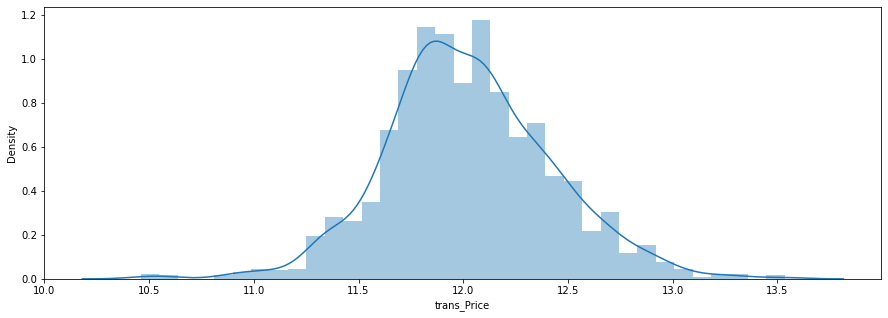

In [79]:
plt.figure(figsize = (15,5))
sns.distplot(df['trans_Price'])
plt.show()

In [80]:
df.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_House,Age_Remoded,Age_Garage,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,trans_Price
0,8450,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,5,5,5,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,0,6,4,2,4,2,4,3,2,6,0,2,6,3,2,5,5,3,4,12.247694
1,9600,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,31,31,31,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,

In [81]:
df.shape

(1459, 214)

Now that our data is clean, we will proceed towards preparing our data for model building

### TRAIN - TEST SPLIT

In [82]:
df_train,df_test = train_test_split(df,train_size = 0.7,random_state=100)

### STANDARDIZING SCALES OF CONTINOUS VARIABLES

There are 4 major methods for scaling the variables, namely
- Standard Scalar
- Minmax Scalar

**Standard Scalar -** _It is also called Z-score normalization. It calculates the z-score of each value and replaces the value with the calculated Z-score. The features are rescaled with Standard Deviation=0 and Mean=1_

**Minmax Scalar -** _It is also referred to as Normalization. The features are scaled between 0 and 1. Here, the mean value remains same as in Standardization, that is, 0._

**Binarizing-** _It is used for binary thresholding of an array like matrix._

**Normalizing-** _It is used to rescale each sample. Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one._


Lets use Standard scalar for our dataset

In [83]:
df = df.drop('SalePrice',axis =1)

In [84]:
df.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_House,Age_Remoded,Age_Garage,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,trans_Price
0,8450,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,5,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,0,6,4,2,4,2,4,3,2,6,0,2,6,3,2,5,5,3,4,12.247694
1,9600,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,31,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [85]:
df.dtypes.value_counts()

uint8      160
int64       33
int32       19
float64      1
dtype: int64

In [86]:
numerical_columns = df.select_dtypes(include = ['int64','float64']).columns.to_list()
scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [87]:
df_train.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_House,Age_Remoded,Age_Garage,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,trans_Price
984,0.115234,-0.646402,-1.016941,-0.337840,-1.325117,-1.519296,0.416867,0.240191,0.0,0.511861,-0.849561,-0.245415,0.907312,-0.763509,1.714442,0.0,0.982785,-0.974794,0.311151,0.348169,-0.795354,-0.816144,-0.390540,0.0,-0.287561,0.0,0.0,0.671322,-0.144328,0.414063,0.126205,126000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,0,-0.790233,-0.512364,3,4,3,2,4,4,4,4,2,6,3,3,5,5,3,4,-0.704494

Lets check the distribution again after scaling of test and train

<AxesSubplot:xlabel='trans_Price', ylabel='Density'>

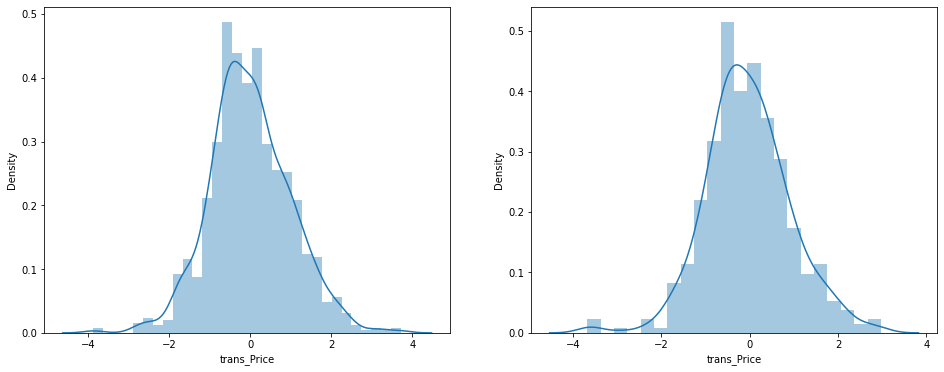

In [88]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train['trans_Price'])
plt.subplot(122)
sns.distplot(df_test['trans_Price'])


Now that we have prepared the data, lets proceed with model building

### MODEL BUILDING

In [89]:
#Lets divide our training data into X and y for model building
y_trn = df_train.pop('trans_Price')
X_trn = df_train

In [90]:
#Lets divide our test data also into X and y
y_tst = df_test.pop('trans_Price')
X_tst = df_test

In [91]:
#Now lets use RFE to find the optimal number of feature
len(X_trn.columns)

213

In [92]:
#Build a Linear Regression model
lm = LinearRegression()
lm.fit(X_trn,y_trn)

LinearRegression()

In [93]:
print(lm.intercept_)
print(lm.coef_)

-4.488311100070017
[ 4.02208685e-02 -1.81463717e-02 -1.40269268e-02 -9.30757366e-03
 -2.68045155e-02  1.06983676e-01 -5.46300863e-02 -2.00885485e-02
 -3.53887824e-10  1.60864652e-01  1.67513392e-02  1.97461694e-03
  2.96772585e-02  2.29937526e-02  2.55192544e-03  1.62005964e-11
 -9.73917736e-04  1.29463149e-02 -9.44552939e-03  5.93325663e-02
  1.89536533e-02  8.54094947e-03  1.09577497e-02  2.95874436e-14
  1.25661920e-02  4.24937863e-14 -5.14588372e-14  4.69871828e-03
 -8.51312682e-02 -3.24381585e-02  1.22907329e-03  6.93916455e-06
 -1.89383392e-01 -1.92109380e-01  1.09783194e-02  4.31172506e-03
 -1.22950081e-01  2.51072278e-02 -2.91958899e-02 -5.81135272e-02
  5.45414982e-02 -2.43636627e-02  4.00087557e-02 -1.54650178e-01
 -8.48671807e-02 -2.66229663e-02  9.31930698e-01  9.53592898e-01
  8.89155310e-01  8.44337614e-01 -6.61941516e-02  4.61383122e-02
  1.29973441e-01 -1.72255641e-01  4.92305332e-03 -2.94117316e-02
 -4.98858045e-02 -1.27601317e-02  7.37753067e-02 -1.44068811e-01
  8.32

In [94]:
y_pred_trn = lm.predict(X_trn)
y_pred_tst = lm.predict(X_tst)

In [95]:

metric = []
r2_train_lr = r2_score(y_trn, y_pred_trn)
print("R-squared of training data : ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_tst, y_pred_tst)
print("R-squared of test data :",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_trn - y_pred_trn))
print('Residual sum of squares of training set :',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_tst - y_pred_tst))
print('Residual sum of squares of test set :',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_trn, y_pred_trn)
print('Mean squared error of training set  ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_tst, y_pred_tst)
print('Mean squared error of training set : ', mse_test_lr)
metric.append(mse_test_lr**0.5)


R-squared of training data :  0.9782784512772171
R-squared of test data : 0.9459078936658551
Residual sum of squares of training set : 22.17770124596126
Residual sum of squares of test set : 21.827242004994773
Mean squared error of training set   0.02172154872278282
Mean squared error of training set :  0.04983388585615245


### Ridge and Lasso Regression

In [96]:
#Lets divide our training data into X and y for model building
df_train,df_test = train_test_split(df,train_size = 0.7,random_state=100)

#Lets divide our training data into X and y for model building
y_train = df_train.pop('trans_Price')
X_train = df_train

#Lets divide our test data also into X and y
y_test = df_test.pop('trans_Price')
X_test = df_test


### Lasso Regression

In [97]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred_l  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred_l))

0.9191706040855988
0.8867990802896762


In [98]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('LotArea', 10.577),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', -0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.01),
 ('FullBath', -0.0),
 ('HalfBath', -0.001),
 ('BedroomAbvGr', 0.011),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.002),
 ('GarageCars', 0.024),
 ('GarageArea', 0.013),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('Age_House', -0.001),
 ('Age_Remoded', -0.002),
 ('Age_Garage', -0.001),
 ('MSSubClass_30', 0.0),
 ('MSSubClass_40', -0.018),
 ('MSSubClass_45', -0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 0.013),
 ('MSSubClass_70', -0.0),
 ('MSSubClass_75', 0.017),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', 0.0),
 ('MSSubClass_120', -0.0),
 ('MSSubC

As we can see the above alpha value is near to optimal for lasso as we can see in the train and test score is quite similar. Now let check whether we can improve our model by using GridSearchCV for optimal value of alpha

In [99]:
# Using KFold for model valodation
folds = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True,
                        n_jobs = -1
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [100]:
# Let have a look on the summery of test and train score based on alpha
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.097741,0.023535,0.007126,0.007517,0.001,{'alpha': 0.001},0.889694,0.786533,0.903258,0.945549,0.905894,0.920197,0.934127,0.889123,0.885155,0.931754,0.899129,0.042442,1,0.921243,0.928677,0.920699,0.916813,0.919437,0.917457,0.918109,0.920171,0.921662,0.917642,0.920191,0.003253
1,0.083111,0.029091,0.004798,0.006515,0.010,{'alpha': 0.01},0.868862,0.779207,0.889805,0.935866,0.890064,0.908020,0.912507,0.861248,0.859940,0.911658,0.881718,0.041437,2,0.892176,0.901686,0.890890,0.887107,0.891206,0.888424,0.888845,0.894228,0.893790,0.888850,0.891720,0.003996
2,0.054735,0.021785,0.003542,0.006183,0.100,{'alpha': 0.1},0.797722,0.737626,0.806869,0.889065,0.838951,0.871625,0.889043,0.813564,0.781980,0.866382,0.829283,0.047741,3,0.842399,0.847081,0.841138,0.833367,0.838313,0.834472,0.833720,0.840813,0.844383,0.835090,0.839077,0.004577
3,0.036171,0.008421,0.003727,0.006207,1.000,{'alpha': 1.0},0.770732,0.717625,0.768115,0.871132,0.812919,0.866852,0.881938,0.802647,0.747617,0.857516,0.809709,0.054941,4,0.822086,0.827146,0.821408,0.813530,0.817337,0.813028,0.813564,0.820107,0.824560,0.814594,0.818736,0.004800
4,0.034529,0.005369,0.006587,0.006953,5.000,{'alpha': 5.0},0.691494,0.635311,0.680233,0.799570,0.720903,0.810963,0.829556,0.752653,0.676705,0.813551,0.741094,0.065892,5,0.757278,0.761306,0.757596,0.745419,0.750785,0.742072,0.742157,0.750135,0.758480,0.743719,0.750895,0.006984


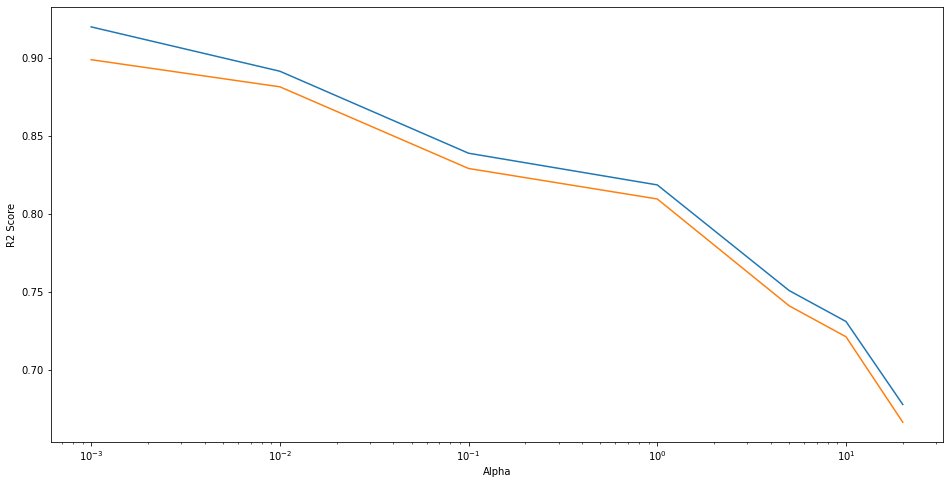

In [101]:
# Plot showing comparision of test and train score
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [102]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [103]:
# After performing grid search we found the same alpha that we use before
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred_l = lasso.predict(X_train)
y_test_pred_l = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred_l))
print(r2_score(y_true=y_test,y_pred=y_test_pred_l))

0.9191706040855988
0.8867990802896762


In [104]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
modelcols = df_train.columns
modelcols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(modelcols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [105]:
# Significant variables which predict price of house when used lasso
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,LotArea,10.576696
63,Neighborhood_Edwards,0.074203
122,Exterior1st_CBlock,0.070523
166,GarageType_Attchd,0.063678
46,MSZoning_RH,0.057281
195,OverallCond,0.053580
83,Condition1_PosA,0.049770
196,ExterQual,0.044651
48,MSZoning_RM,0.039137
184,SaleType_Oth,0.034786



### Now lets use the ridge regression

In [106]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred_r = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred_r))
y_test_pred_r = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred_r))

0.9493534553946585
0.8836410982779197


As we can see the above alpha value is not optimal for ridge there are sign of overfitting. We can see that there is a clear difference in the train and test score. Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [107]:
folds  = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        n_jobs = -1,
                        return_train_score=True)
                        

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [108]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.020977,0.008152,0.004057,0.003891,0.001,{'alpha': 0.001},0.892899,0.705671,0.822748,0.856251,0.880920,0.933911,0.922697,0.882455,0.920098,0.811160,0.862881,0.065232,10,0.952455,0.955330,0.951242,0.948569,0.951235,0.948480,0.949889,0.950383,0.950670,0.950605,0.950886,0.001871
1,0.028661,0.012574,0.010510,0.008710,0.010,{'alpha': 0.01},0.892768,0.707199,0.834429,0.870049,0.883032,0.931610,0.923694,0.883431,0.919651,0.826755,0.867262,0.062911,9,0.952392,0.955326,0.951188,0.948524,0.951160,0.948421,0.949814,0.950316,0.950608,0.950553,0.950830,0.001882
2,0.028637,0.005563,0.005539,0.003074,0.100,{'alpha': 0.1},0.891254,0.717765,0.880923,0.921127,0.892215,0.919173,0.926109,0.887567,0.916358,0.886914,0.883940,0.057637,8,0.950655,0.955105,0.949555,0.947058,0.949180,0.946889,0.947989,0.948504,0.948926,0.948896,0.949276,0.002216
3,0.027575,0.013392,0.013748,0.016310,0.200,{'alpha': 0.2},0.890039,0.724101,0.894601,0.933424,0.896143,0.914043,0.927555,0.889642,0.914025,0.902747,0.888632,0.056724,7,0.949179,0.954708,0.948044,0.945627,0.947553,0.945618,0.946487,0.946979,0.947504,0.947322,0.947902,0.002487
4,0.031802,0.013459,0.006027,0.007389,0.500,{'alpha': 0.5},0.887974,0.732567,0.904856,0.941501,0.900866,0.909718,0.930346,0.892957,0.909601,0.914056,0.892444,0.055416,6,0.946573,0.953418,0.945236,0.942888,0.944728,0.943298,0.943766,0.944307,0.945015,0.944450,0.945368,0.002860


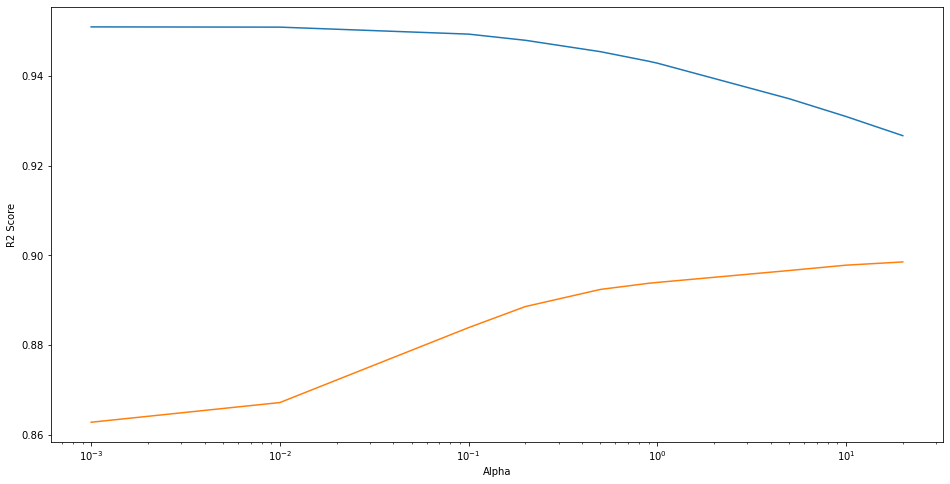

In [109]:
# Plot showing comparision of test and train score
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [110]:
#On the basis of above graph lets create the model

# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20.0}

In [111]:
# After performing grid search we found the optimal alpha to be 20, so let's predict the test and train scores.
ridge = Ridge(alpha = 20.0)
ridge.fit(X_train,y_train)

y_pred_train_r = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train_r))

y_pred_test_r = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test_r))

0.925960210786998
0.8898604790084986


In [112]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
modelcols = df_train.columns
modelcols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(modelcols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef

,Feature,Coef
0,LotArea,10.546435
1,MasVnrArea,0.000009
2,BsmtFinSF1,0.000016
3,BsmtFinSF2,0.000042
4,BsmtUnfSF,-0.000038
...,...,...
207,GarageFinish,-0.002650
208,GarageQual,-0.005300
209,GarageCond,0.007910
210,PoolQC,0.000592


In [113]:
# Significant variables which predict price of house when used ridge
ridge_coef.sort_values(by = 'Coef',ascending = False).head(10)

,Feature,Coef
0,LotArea,10.546435
63,Neighborhood_Edwards,0.061052
166,GarageType_Attchd,0.057455
122,Exterior1st_CBlock,0.055847
83,Condition1_PosA,0.048288
195,OverallCond,0.048215
196,ExterQual,0.044514
46,MSZoning_RH,0.043989
72,Neighborhood_NridgHt,0.038564
79,Neighborhood_Timber,0.038396


# Final Model

In [114]:
# We have used lasso for building the model as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_train_pred_l = lasso.predict(X_train)
y_test_pred_l = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred_l))
print(r2_score(y_true = y_test,y_pred = y_test_pred_l))

0.9191706040855988
0.8867990802896762


# Conclusion

The variables which help in predicting the housing prices are:


-  LotArea	- Lot size in square feet
-  Neighborhood_Edwards - Physical locations within Ames city limits - Edwards	
-  Exterior1st_CBlock - Exterior covering on house with Cinder Block	
-  GarageType_Attchd - Garage attached to the home	
-  MSZoning_RH	- High density of population in a residential zone
-  OverallCond	- Overall Condition of the house
-  Condition1_PosA	- Proximity to various conditions - Adjacent to postive off-site feature
-  ExterQual - The quality of material on the exterior
-  MSZoning_RM	- Medium density of population in a residential zone
-  SaleType_Oth - Type of sale	

The optimal value of lambda for Ridge and Lasso are:
- Lasso : 0.001
- Ridge : 20

### Coding for subjective questions

In [116]:
## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=40)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=40)

In [119]:
## Make predictions
y_train_pred_r = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred_r))
y_test_pred_r = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred_r))

0.9215319651711016
0.8873418407495501


In [120]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [121]:
## Make predictions
y_train_pred_l = lasso.predict(X_train)
print(r2_score(y_train,y_train_pred_l))
y_test_pred_l = lasso.predict(X_test)
print(r2_score(y_test,y_test_pred_l))

0.9096057404339412
0.877943773856598


In [129]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
df = df.drop(['trans_Price'],axis =1)

In [130]:
betas = pd.DataFrame(index=df.columns)
betas.rows = df.columns
betas

""
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
...
GarageFinish
GarageQual
GarageCond
PoolQC


Now lets look at the most important variable after the lambdas are changed

In [131]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [132]:
betas

,Ridge,Lasso
LotArea,0.000009,0.000010
MasVnrArea,0.000018,0.000002
BsmtFinSF1,0.000045,0.000057
BsmtFinSF2,-0.000040,-0.000026
BsmtUnfSF,-0.000037,-0.000032
...,...,...
GarageFinish,-0.005457,-0.003758
GarageQual,0.008026,0.007637
GarageCond,0.000749,0.000000
PoolQC,-0.005679,-0.000000


Lets look at the most important variable after the lambdas are changed

In [134]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual             0.049664
CentralAir_Y            0.045275
OverallCond             0.045043
Neighborhood_Crawfor    0.044857
Exterior1st_BrkFace     0.040894
Condition1_Norm         0.040785
MSZoning_FV             0.030430
SaleCondition_Normal    0.027080
Fireplaces              0.026679
Neighborhood_BrkSide    0.025807
Name: Ridge, dtype: float64

In [135]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual             1.050918
CentralAir_Y            1.046316
OverallCond             1.046073
Neighborhood_Crawfor    1.045878
Exterior1st_BrkFace     1.041742
Condition1_Norm         1.041628
MSZoning_FV             1.030898
SaleCondition_Normal    1.027450
Fireplaces              1.027038
Neighborhood_BrkSide    1.026143
Name: Ridge, dtype: float64

In [136]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual             0.057800
CentralAir_Y            0.049645
Neighborhood_Crawfor    0.048381
OverallCond             0.045864
Exterior1st_BrkFace     0.040281
Condition1_Norm         0.039880
Fireplaces              0.027503
MSZoning_RL             0.026140
MSZoning_FV             0.023079
Foundation_PConc        0.019974
Name: Lasso, dtype: float64

In [137]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual             1.059503
CentralAir_Y            1.050898
Neighborhood_Crawfor    1.049571
OverallCond             1.046932
Exterior1st_BrkFace     1.041103
Condition1_Norm         1.040686
Fireplaces              1.027885
MSZoning_RL             1.026485
MSZoning_FV             1.023348
Foundation_PConc        1.020174
Name: Lasso, dtype: float64

#### CODING FOR PREDICTING FIVE IMPORTANT VARIABLES IN LASSO MODEL AFTER THE INCOMING DATA IS MISSING TOP 5 PREDICTORS

In [138]:
#Lets drop the top 5 Lasso predictorsMSZoning_RH	
topfive = ['LotArea','Neighborhood_Edwards','GarageType_Attchd','Exterior1st_CBlock','MSZoning_RH']

In [139]:
## drop them from train and test data
X_train_dropped = X_train.drop(topfive, axis=1)
X_test_dropped = X_test.drop(topfive, axis=1)

In [141]:
# Using KFold for model valodation
folds = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True,
                        n_jobs = -1
                       )

model_cv.fit(X_train_dropped,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [142]:
## View the optimal value of alpha
model_cv.best_params_

{'alpha': 0.001}

Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value

In [143]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [144]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [145]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [146]:
y_train_pred_l2 = lasso.predict(X_train_dropped)
print(r2_score(y_train,y_train_pred_l2))
y_test_pred_l2 = lasso.predict(X_test_dropped)
print(r2_score(y_test,y_test_pred_l2))

0.9165757853400989
0.8842747660019069


Now, we will find the top 5 predictors

In [147]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

""
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
...
GarageFinish
GarageQual
GarageCond
PoolQC


In [148]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Lasso'] = lasso.coef_

In [149]:
betas

,Lasso
MasVnrArea,0.000002
BsmtFinSF1,0.000055
BsmtFinSF2,-0.000007
BsmtUnfSF,-0.000032
TotalBsmtSF,0.000225
...,...
GarageFinish,-0.005908
GarageQual,0.009543
GarageCond,0.000000
PoolQC,-0.000000


In [150]:
betas['Lasso'].sort_values(ascending=False)[:5]

Neighborhood_Crawfor    0.088122
CentralAir_Y            0.070992
Exterior1st_BrkFace     0.069739
MSZoning_FV             0.055165
OverallQual             0.052970
Name: Lasso, dtype: float64